# What is survival analysis?

A branch of statistics focussed on analyzing time to an event.

Broad applications across industries...

* Time until equipment failure
* Time until loan default
* Time until free-trials users convert to subscribers 

## Terms used..
### Event:
Equipment failure, loan default, desease recurrence, user conversion, or other experience of interest
### Survival:
The event of interest does not occur.
### Survival duration:
Time until the eventof interest occurs(or the end of observations)

In [1]:
%%html
<style>
table {float:left}
</style>

**censored data:**
unknown values beyond a bound on either end. it can exist by design. when the data is observed and researcher has made the decision to restrict the range of the scale.

**Truncated data:**
When values beyond a boundary are either excluded when gathered or excluded when analyzed.

data are censored when we have partial information about the value of a variable - we know it is beyond some boundary, but not how far above or below it.

In contrast, data are truncated when the data set does not include observations in the analysis that are beyond a boundary value. Having a value beyond the boundary eliminates that individual from being in the analysis.

![censorship](./img/censorship.png)

## Why is censorship bad?

|**Aggregated statistics** | **Regression** |
|--------------------------|----------------|
|* A type of missing data  |* Linear regression line minimizes the sum of squared errors |
|* Skew statistics, i.e. `np.averages()`, `max()`, `min()` | * For censored data, we don't know the error terms. |


## The survival function
* Does not impute censored data.
* Models the probability of a survival duration being larger than a certain value.

$S(t) = Pr(T>t)$

In [2]:
import pandas as pd
import numpy as np

In [ ]:
# let's create a contrived data with randomness

dates_arr = np.arange()


In [12]:
date_arr = np.arange('2005-02', 50, dtype='datetime64[D]')
date_arr = np.append(date_arr.astype('object'), np.nan)
probs = np.append(np.repeat(.006, 50), 0.70)
births = np.random.choice(date_arr, 90, p=probs )
deaths = np.random.choice(date_arr, 90, p=probs )
df_contrived = pd.DataFrame.from_dict({'births': births, 'deaths': deaths})
df_contrived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   births  25 non-null     object
 1   deaths  35 non-null     object
dtypes: object(2)
memory usage: 1.5+ KB


In [13]:
df_contrived.head()

births      deaths
0         NaN         NaN
1         NaN  2005-03-03
2         NaN         NaN
3  2005-03-17         NaN
4         NaN         NaN

In [14]:
def is_observed(row):
    if pd.isna(row['births']):
        flag = 0
    elif pd.isna(row['deaths']):
        flag = 0
    else:
        flag = 1
    return flag
    

In [15]:
df_contrived['observed'] = df_contrived.apply(is_observed, axis=1)
print(np.average(df_contrived['observed']))

0.12222222222222222


In [18]:
import lifelines
from lifelines.datasets import load_waltons

In [19]:
df = load_waltons()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       163 non-null    float64
 1   E       163 non-null    int64  
 2   group   163 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.9+ KB


In [20]:
df.head()

T  E    group
0   6.0  1  miR-137
1  13.0  1  miR-137
2  13.0  1  miR-137
3  13.0  1  miR-137
4  19.0  1  miR-137

T is an array of durations, E is a either boolean or binary array representing whether the “death” was observed or not (alternatively an individual can be censored)

In [22]:
T = df['T']
E = df['E']
kmf = lifelines.KaplanMeierFitter()
kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 163 total observations, 7 right-censored observations>

<AxesSubplot:xlabel='timeline'>

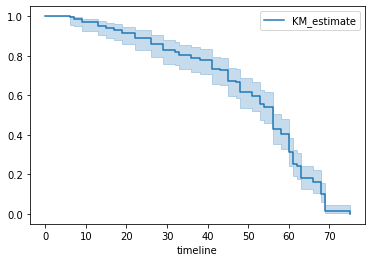

In [24]:
kmf.plot_survival_function()

## Kaplan-Meier estimator

A non-parametric statistic that **estimates the survival function** of **time-to-event** data.</br>
* Also known as
  * the product-limit estimator
  * the K-M estimator
* Non-parametric: constructs a survival curve from collected data and does not assume underlying distribution.

### The mathematical intuition
**Definitions**
* $t_i$: a duration time
* $d_i$: number of events that happened at time $t_i$.
* $n_i$: nmber of individuals known to have survived up to time $t_i$.

Survival function $S(t)$ is estimated with: </br>
$S(t) = \Pi_{i:t_i\le(t)}(1 - \frac{d_i}{n_i})$